In [12]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout

In [13]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [14]:
print('the shape of training images: ', X_train.shape)
print('the shape of testing images: ', X_test.shape)
print('the shape of training labels: ', y_train.shape)
print('the shape of testing labels: ', y_test.shape)

the shape of training images:  (60000, 28, 28)
the shape of testing images:  (10000, 28, 28)
the shape of training labels:  (60000,)
the shape of testing labels:  (10000,)


**Visualization**

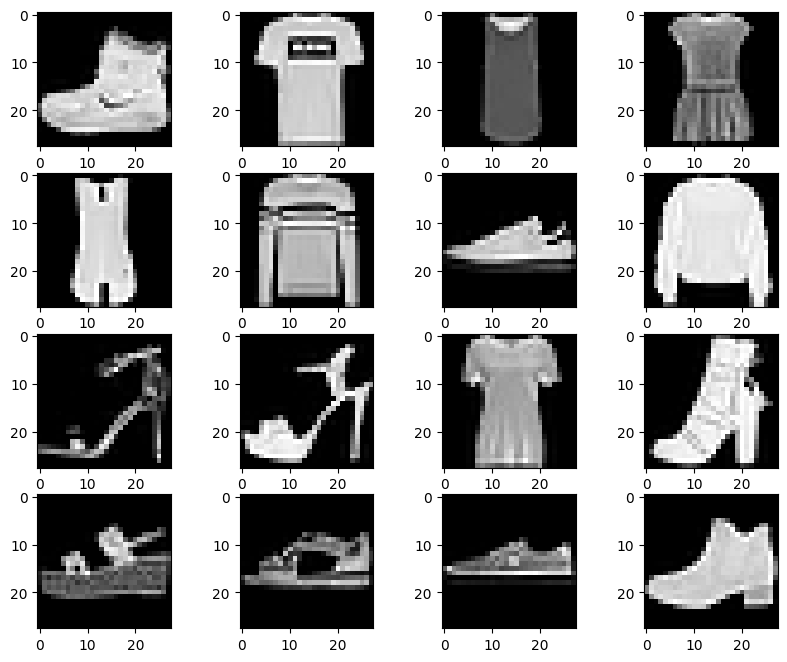

In [15]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10,8))
cnt = 0
for i in range (4):
  for j in range (4):
    axs[i, j].imshow(X_train[cnt], cmap='gray')
    cnt += 1
plt.show()

**Normalization**

In [16]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

**Building the model**

In [30]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization()) #optional
# model.add(Dropout(0.2))  #optional
# model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476,490 (1.82 MB)

 Trainable params: 476,490 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# loss function : Multicalass clasification:
#sparse categorical -- > labels are intergers / 0, 1, 2 , ...9
# categorical crossentropy --> labels are one hot encoded 0001 / 10000 / ... etc
#--------
#Binary classification:
#binary cross entropy

In [32]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7837 - loss: 0.6136 - val_accuracy: 0.8403 - val_loss: 0.4461
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8632 - loss: 0.3777 - val_accuracy: 0.8549 - val_loss: 0.3951
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8770 - loss: 0.3318 - val_accuracy: 0.8638 - val_loss: 0.3870
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8848 - loss: 0.3097 - val_accuracy: 0.8739 - val_loss: 0.3451
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8913 - loss: 0.2910 - val_accuracy: 0.8697 - val_loss: 0.3677
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8981 - loss: 0.2706 - val_accuracy: 0.8802 - val_loss: 0.3348
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9036 - loss: 0.2592 - val_accuracy: 0.8763 - val_loss: 0.3512
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9077 - loss: 0.2469 -

**model evaluation**

In [33]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss: ', loss)
print('Test accuracy: ', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8869 - loss: 0.3154
Test loss:  0.31463298201560974
Test accuracy:  0.8902999758720398


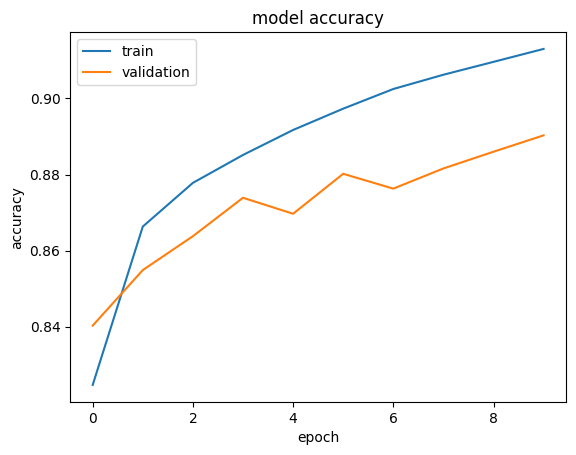

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [35]:
y_pred = model.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[5.2029742e-07, 2.7063520e-06, 1.3922452e-09, ..., 9.2418063e-03,
        3.0080603e-06, 9.9035668e-01],
       [1.6313066e-05, 4.3749837e-11, 9.9690169e-01, ..., 1.0512554e-17,
        4.1084713e-09, 8.1947195e-17],
       [2.3596272e-18, 1.0000000e+00, 8.1065098e-21, ..., 5.5285835e-35,
        1.1000831e-24, 2.6053171e-29],
       ...,
       [3.8206153e-08, 3.2402725e-10, 5.1287383e-09, ..., 4.9791567e-11,
        9.9999952e-01, 1.1018669e-10],
       [9.8406190e-09, 9.9999356e-01, 3.9474041e-10, ..., 3.6218335e-16,
        2.4600008e-10, 2.3153566e-13],
       [3.1289403e-06, 6.6157116e-07, 1.6520555e-05, ..., 1.8053791e-03,
        3.9983646e-05, 9.4691626e-05]], dtype=float32)

In [36]:
print('probabilities: ', y_pred[0])
print('predicted class: ', np.argmax(y_pred[0]))

probabilities:  [5.2029742e-07 2.7063520e-06 1.3922452e-09 1.2181824e-08 7.4900260e-07
 3.9447215e-04 7.3674890e-08 9.2418063e-03 3.0080603e-06 9.9035668e-01]
predicted class:  9


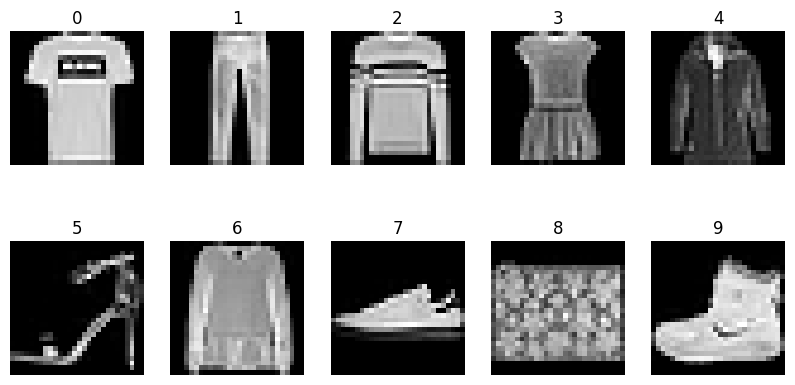

In [63]:

plt.figure(figsize=(10, 5))
for i in range(10):
    # Find an image for each class
    idx = np.where(y_train == i)[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(y_train[idx])
    plt.axis('off')
plt.show()

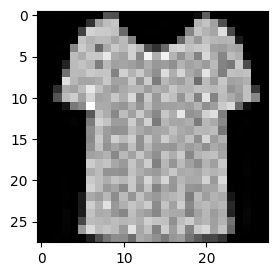

In [58]:
plt.figure(figsize=(3,3))
plt.imshow(X_test[1000], cmap='gray')

In [53]:
print('actual class: ', y_test[1000])

actual class:  0
